Question 1

(512, 512)
512
512
(262144, 3)


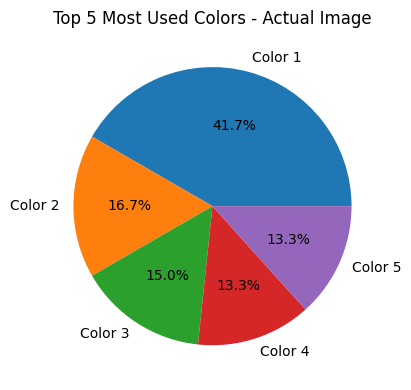

In [34]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# opening image
image_path = 'test.png'
image = Image.open(image_path)

#convert
image = image.convert('RGB')

width, height = image.size
print(image.size)
print(width)
print(height)
rgb_values = []
for y in range(height):
    for x in range(width):
        r, g, b = image.getpixel((x, y))
        rgb_values.append((r, g, b))

# extract rgb array

rgb_array = np.array(rgb_values)
print(rgb_array.shape)

# Calculate the frequencies of each color in the actual image
actual_colors, actual_counts = np.unique(rgb_array, axis=0, return_counts=True)

# Sort colors based on their frequencies and select the top 5
sorted_indices = np.argsort(actual_counts)[::-1][:5]
top_colors = actual_colors[sorted_indices]
top_counts = actual_counts[sorted_indices]

# Plot pie chart for top 5 colors in the actual image
plt.figure(figsize=(8, 4))
plt.pie(top_counts, labels=['Color {}'.format(i+1) for i in range(len(top_colors))], autopct='%1.1f%%')
plt.title('Top 5 Most Used Colors - Actual Image')

plt.tight_layout()
plt.show()

In [35]:
print(rgb_array[:,0])

[164  63  75 ...   5   2   4]


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
# as a panda dataframe

df = pd.DataFrame(rgb_array, columns=['red', 'green', 'blue'])
print(df)

        red  green  blue
0       164    150    71
1        63     57    31
2        75     43    10
3        95     94    46
4       157    140    73
...     ...    ...   ...
262139    3      5     6
262140    2      5     3
262141    5      8     5
262142    2      5     0
262143    4      5     2

[262144 rows x 3 columns]


In [37]:
print(df.iloc[:,0].mean())

137.3913345336914


In [38]:
print(df['red'].mean())

137.3913345336914


(a) Implement a function – computeCentroid, that takes n 3-dimensional features and returns their mean.

In [39]:
#compute centroid function
def computeCentroid(data):
    centroid = []
    for i in data:
        mean = data[i].mean()
        centroid.append(mean)

    return centroid


In [40]:
cnt = computeCentroid(df)
print(cnt)

[137.3913345336914, 128.8587760925293, 113.11710739135742]


In [41]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(rgb_array)
# scaled_data = scaler.transform(rgb_array)
# print(scaled_data)

(b) Implement a function – mykmeans

In [42]:
import random

# creating important functions

def assign_clusters(X, centroids):
    cluster_group = []
    distances = []

    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    classifications = np.argmin(distances, axis=1)


    return classifications


def move_centroids(X,cluster_group):
    new_centroids = []

    cluster_type = np.unique(cluster_group)

    for type in cluster_type:
        new_centroids.append(X[cluster_group == type].mean(axis=0))

    return np.array(new_centroids)

# mykmeans functions
def mykmeans(X, n_clusters, max_itr):
    centroids = X[random.sample(range(0,X.shape[0]),n_clusters)]
    # print(centroids)
    for i in range(max_itr):
        # assign clusters
        cluster_group = assign_clusters(X, centroids)
        old_centroids = centroids

        # move centroids
        centroids = move_centroids(X,cluster_group)

        # check finish
        if (old_centroids == centroids).all():
            print('K-means done')
            break

    return cluster_group,centroids


In [43]:
y_pred,cluster_centroids = mykmeans(rgb_array,6,100)

K-means done


In [44]:
y_pred.shape

(262144,)

In [45]:
print(np.unique(y_pred))

[0 1 2 3 4 5]


In [46]:
print(cluster_centroids)

[[232.18123674  83.58062699  57.60485154]
 [139.37256664 186.63626834 220.84735949]
 [168.58771124 173.25500551 157.8771813 ]
 [178.56721057 156.53454275  86.48214587]
 [108.37403968 121.37282096 103.58450835]
 [ 69.95847937  69.21602225  54.06388503]]


In [47]:
rgb_data = rgb_array.copy()

In [48]:
for i in np.unique(y_pred):
    rgb_data[y_pred == i] = cluster_centroids[i]

In [49]:
rgb_data[:10]

array([[178, 156,  86],
       [ 69,  69,  54],
       [ 69,  69,  54],
       [ 69,  69,  54],
       [178, 156,  86],
       [ 69,  69,  54],
       [ 69,  69,  54],
       [ 69,  69,  54],
       [ 69,  69,  54],
       [ 69,  69,  54]])

In [50]:
import matplotlib.pyplot as plt



def show_comp_img(rgb_array):
    # Open the image
    image = Image.open("test.png")

    # Convert the image to a numpy array
    image_array = np.array(image)
    height, width, _ = image_array.shape


    image_array[:] = rgb_array.reshape(height, width, 3)

    updated_image = Image.fromarray(image_array)

    # Save the updated image
    updated_image.save("updated_image.png")

    # Open the images
    image1 = Image.open("test.png")
    image2 = Image.open("updated_image.png")

    # Create a new blank image with twice the width of the original images
    new_image = Image.new('RGB', (width * 2, height))

    # Paste the first image on the left side of the new image
    new_image.paste(image1, (0, 0))

    # Paste the second image on the right side of the new image
    new_image.paste(image2, (width, 0))

    # Display the new image
    plt.imshow(new_image)
    plt.axis('off')
    plt.show()



In [51]:
rgb_data.shape


(262144, 3)

In [52]:
rgb_data

array([[178, 156,  86],
       [ 69,  69,  54],
       [ 69,  69,  54],
       ...,
       [ 69,  69,  54],
       [ 69,  69,  54],
       [ 69,  69,  54]])

(c)show compressed images for different values of k.

K-means done
value of k is 1


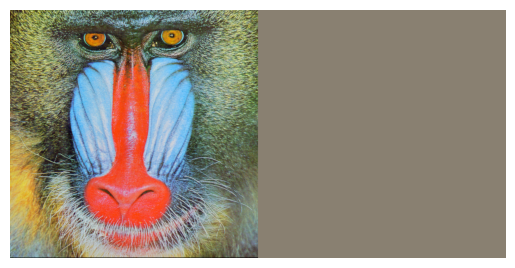

[[137 128 113]
 [137 128 113]
 [137 128 113]
 ...
 [137 128 113]
 [137 128 113]
 [137 128 113]]
K-means done
value of k is 2


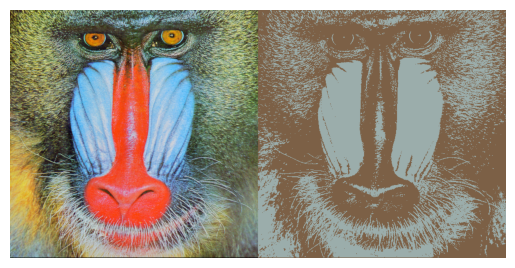

[[124  96  70]
 [124  96  70]
 [124  96  70]
 ...
 [124  96  70]
 [124  96  70]
 [124  96  70]]
K-means done
value of k is 3


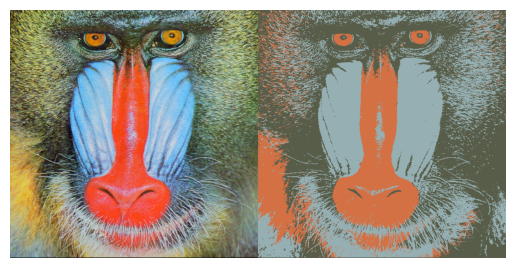

[[211 113  69]
 [ 88  93  74]
 [ 88  93  74]
 ...
 [ 88  93  74]
 [ 88  93  74]
 [ 88  93  74]]
K-means done
value of k is 4


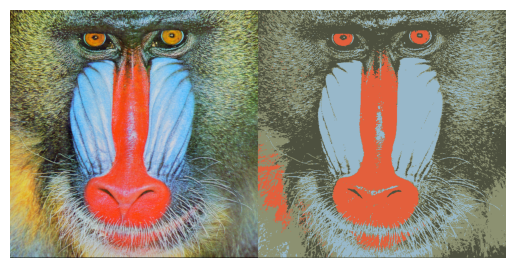

[[140 145 113]
 [ 77  80  63]
 [ 77  80  63]
 ...
 [ 77  80  63]
 [ 77  80  63]
 [ 77  80  63]]
K-means done
value of k is 5


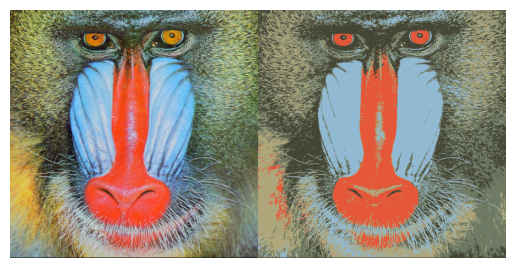

[[175 167 123]
 [ 69  69  54]
 [ 69  69  54]
 ...
 [ 69  69  54]
 [ 69  69  54]
 [ 69  69  54]]
K-means done
value of k is 6


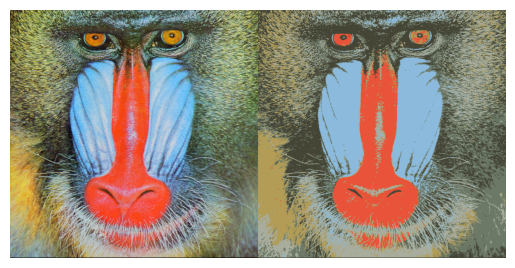

[[178 156  86]
 [ 69  69  54]
 [ 69  69  54]
 ...
 [ 69  69  54]
 [ 69  69  54]
 [ 69  69  54]]
K-means done
value of k is 7


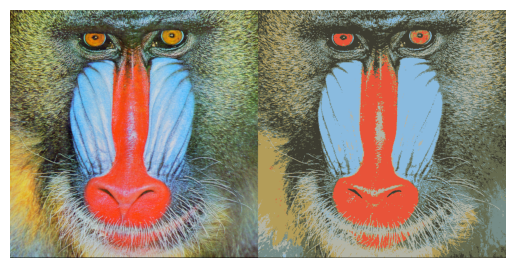

[[179 157  89]
 [ 61  60  49]
 [ 61  60  49]
 ...
 [ 61  60  49]
 [ 61  60  49]
 [ 61  60  49]]
K-means done
value of k is 8


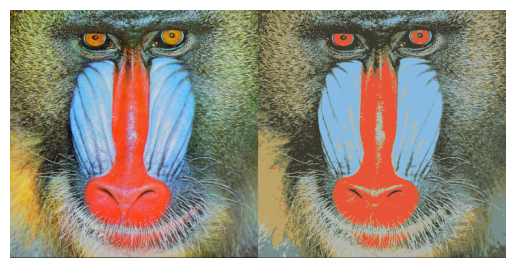

[[132 125  80]
 [ 58  55  45]
 [ 58  55  45]
 ...
 [ 58  55  45]
 [ 58  55  45]
 [ 58  55  45]]
K-means done
value of k is 9


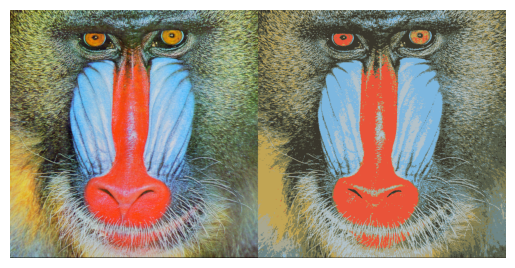

[[193 165  84]
 [ 57  54  44]
 [ 57  54  44]
 ...
 [ 57  54  44]
 [ 57  54  44]
 [ 57  54  44]]
K-means done
value of k is 10


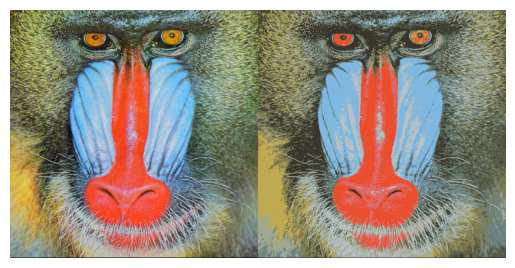

[[191 170  82]
 [ 57  53  44]
 [ 57  53  44]
 ...
 [ 57  53  44]
 [ 57  53  44]
 [ 57  53  44]]


In [53]:
k_vals = [1,2,3,4,5,6,7,8,9,10]

#clustering through mykmeans

for i in k_vals:
    y_pred,cluster_centroids = mykmeans(rgb_array,i,250)
    rgb_data = rgb_array.copy()
    for j in np.unique(y_pred):
        rgb_data[y_pred == j] = cluster_centroids[j]
    print(f'value of k is {i}')
    show_comp_img(rgb_data)
    print(rgb_data)

K-means done


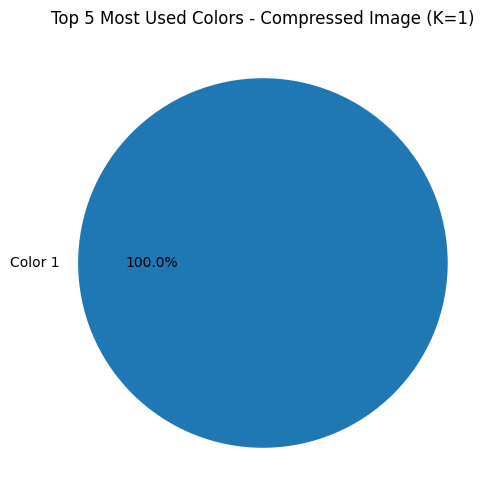

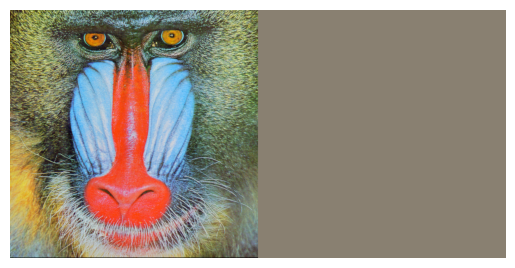

K-means done


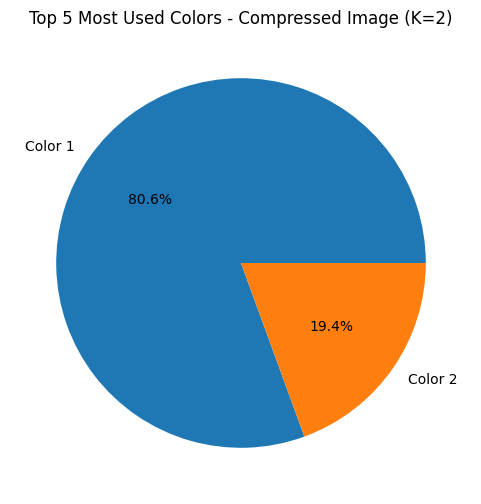

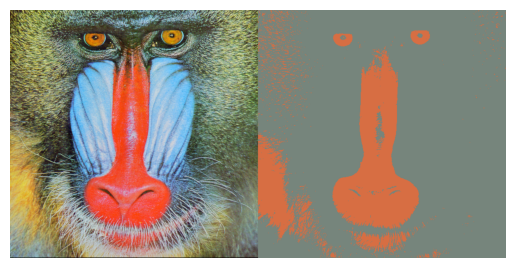

K-means done


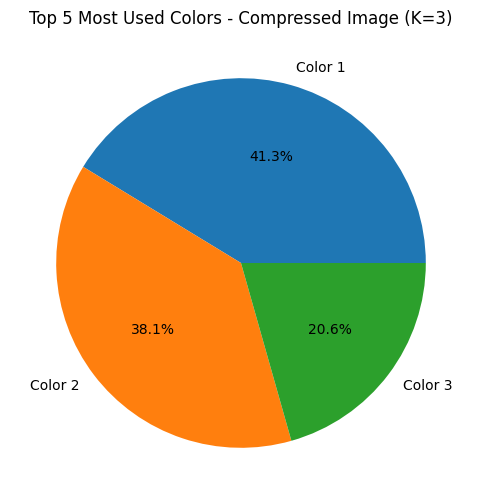

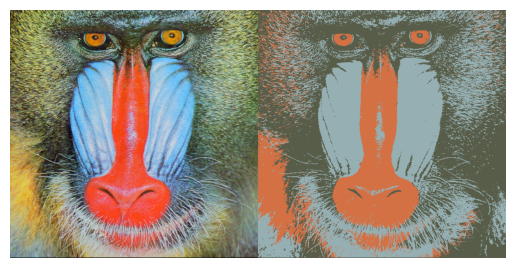

K-means done


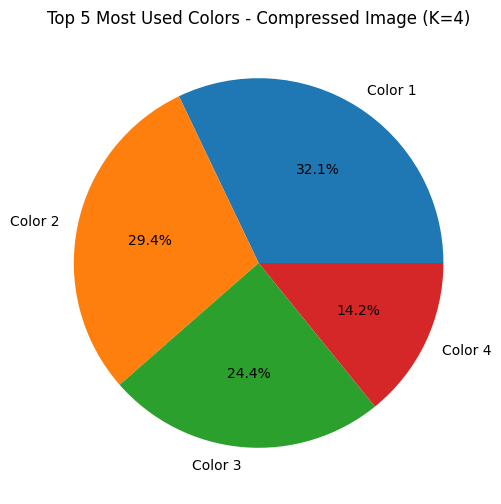

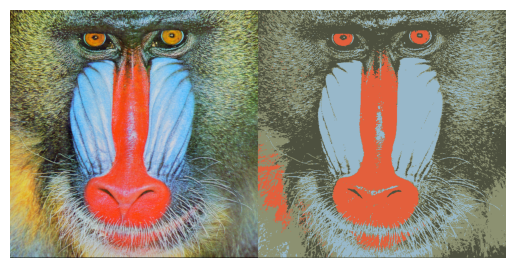

K-means done


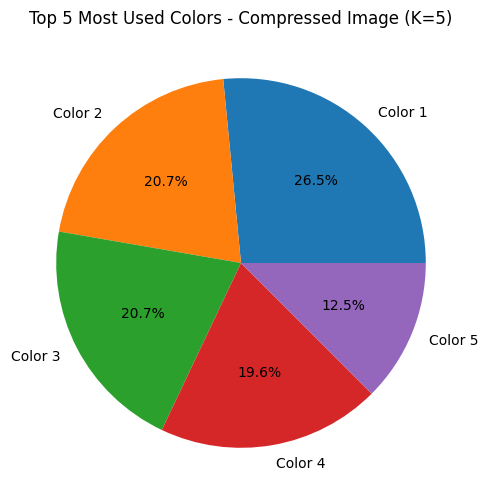

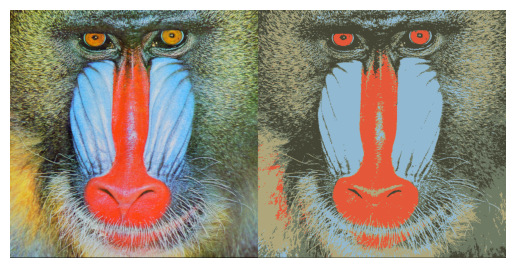

K-means done


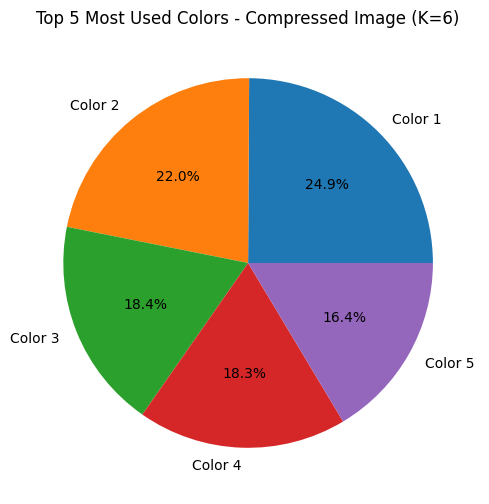

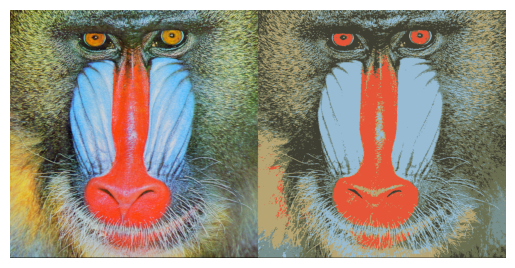

K-means done


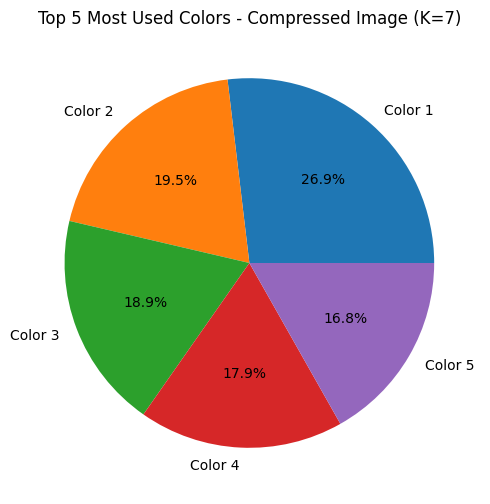

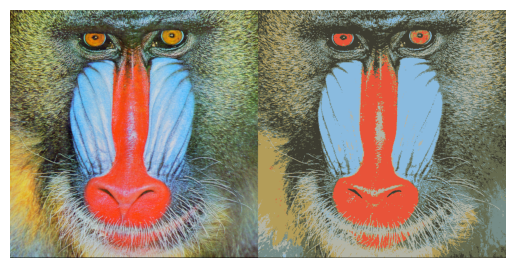

K-means done


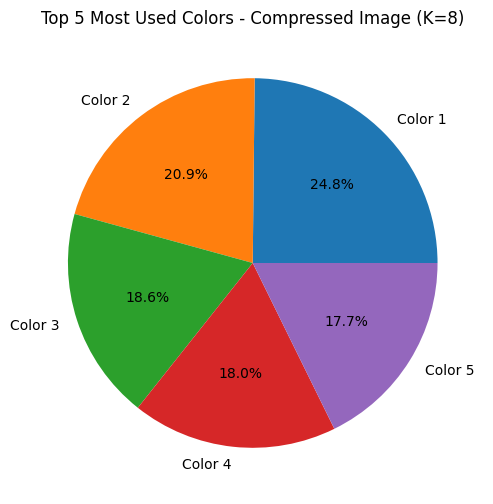

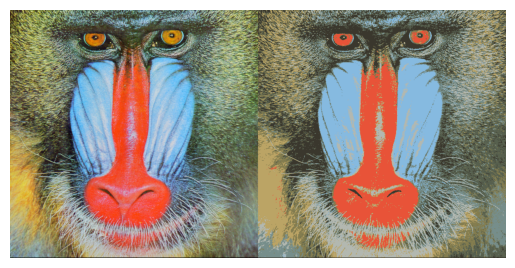

K-means done


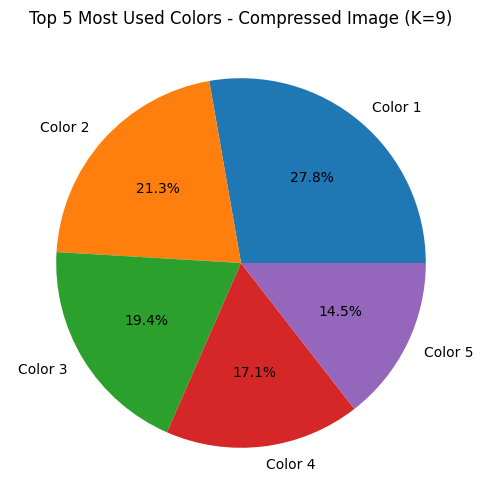

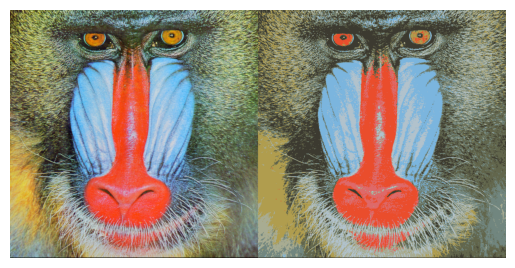

K-means done


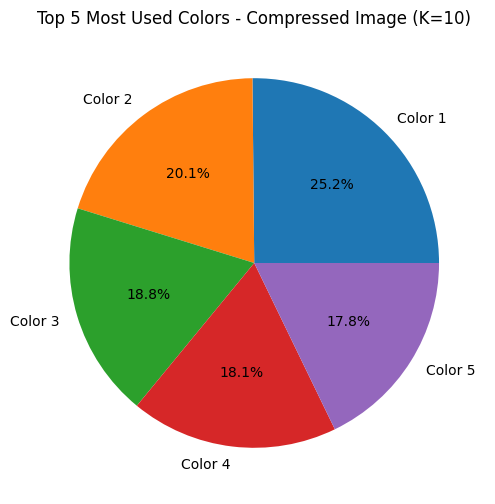

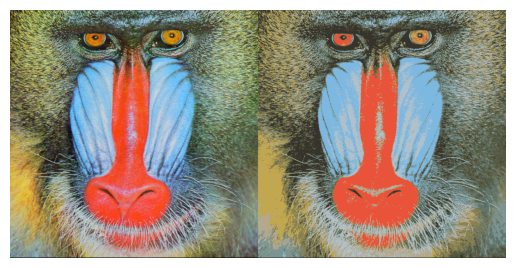

In [54]:
from collections import Counter
import matplotlib.pyplot as plt

k_vals = [1,2,3,4,5,6,7,8,9,10]

#doing the same thing with top 5 color piechart

for k in k_vals:

    y_pred, cluster_centroids = mykmeans(rgb_array, k, 250)


    compressed_data = rgb_array.copy()
    for j in np.unique(y_pred):
        compressed_data[y_pred == j] = cluster_centroids[j]

    # Calculate the frequencies of each color in the compressed image
    compressed_colors, compressed_counts = np.unique(compressed_data, axis=0, return_counts=True)

    # Sort colors based on their frequencies and select the top 5
    sorted_indices = np.argsort(compressed_counts)[::-1][:5]
    top_colors = compressed_colors[sorted_indices]
    top_counts = compressed_counts[sorted_indices]

    # Plot pie chart for top 5 colors in the compressed image
    plt.figure(figsize=(6, 6))
    plt.pie(top_counts, labels=['Color {}'.format(i+1) for i in range(len(top_colors))], autopct='%1.1f%%')
    plt.title(f'Top 5 Most Used Colors - Compressed Image (K={k})')
    plt.show()

    # Display the compressed image
    show_comp_img(compressed_data)


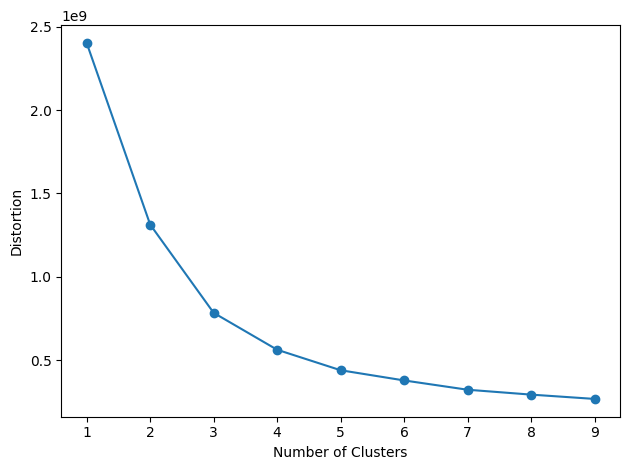

In [55]:
# elbow method to check the number of clusters
# distortion vs number of clusters
# through sklearn inertia

from sklearn.cluster import KMeans
distortions = []
for i in range(1,10):
  km = KMeans(n_clusters =i, init='k-means++',n_init=10,max_iter=300,random_state=0)
  km.fit(rgb_array)
  distortions.append(km.inertia_)
plt.plot(range(1,10),distortions,marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [56]:
# k=5 through elbow method

(d) Show the results of compressed images using the k-means implementation of the sklearn library.

(262144, 3)
(512, 512, 3)


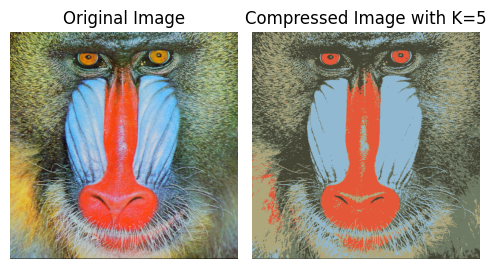

In [57]:
# Perform KMeans clustering
k = 5
kmeans = KMeans(n_clusters=k,n_init=10, random_state=0,max_iter=300)
labels = kmeans.fit_predict(rgb_array)
centroids = kmeans.cluster_centers_.astype(np.uint8)
compressed_data = centroids[labels]
print(compressed_data.shape)
# Reshape the compressed data back to the image shape
compressed_image = compressed_data.reshape((512, 512,3))
print(compressed_image.shape)
# Display the original and compressed images side by side
plt.figure(figsize=(5, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('off')
plt.title('Original Image')

# Compressed image
plt.subplot(1, 2, 2)
plt.imshow(compressed_image)
plt.axis('off')
plt.title(f'Compressed Image with K={k}')

plt.tight_layout()
plt.show()


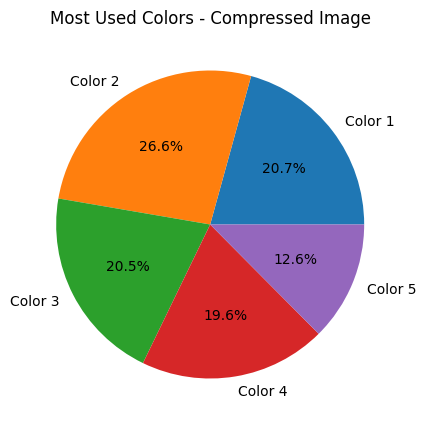

In [58]:
from collections import Counter

# Get the colors and their frequencies for the compressed image
compressed_colors, compressed_counts = np.unique(compressed_data, axis=0, return_counts=True)

# Plot pie chart for compressed image
plt.figure(figsize=(5, 5))
plt.pie(compressed_counts, labels=['Color {}'.format(i+1) for i in range(len(compressed_colors))], autopct='%1.1f%%')
plt.title('Most Used Colors - Compressed Image')

plt.show()


(e) Spatial coherence:

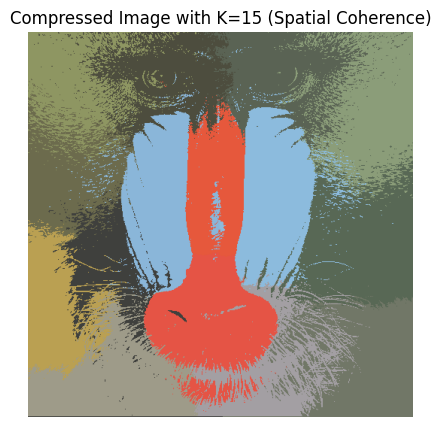

In [59]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def spatial_distance(p1, p2):
    # Euclidean distance between two spatial points
    return np.sqrt(np.sum((p1 - p2)**2))

def spatially_weighted_distance(p1, p2, spatial_weight=10):
    # Weighted distance metric incorporating both color and spatial proximity
    color_distance = np.sqrt(np.sum((p1[:3] - p2[:3])**2))
    spatial_dist = spatial_weight * spatial_distance(p1[3:], p2[3:])
    return color_distance + spatial_dist

# Load the image
image_path = 'test.png'
image = Image.open(image_path)
image = image.convert('RGB')
width, height = image.size

# Convert the image into a 2D array of pixels
rgb_values = []
for y in range(height):
    for x in range(width):
        r, g, b = image.getpixel((x, y))
        rgb_values.append([r, g, b, x, y])  # Adding spatial coordinates

rgb_array = np.array(rgb_values)

# Perform KMeans clustering with dynamic spatial weight
k = 15 # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10, max_iter=300)

# Custom distance function for KMeans
def custom_distance(x, y):
    # Calculate spatial weight dynamically based on spatial distance
    spatial_dist = spatial_distance(x[3:], y[3:])
    spatial_weight = 1 / (spatial_dist + 1)  # Inverse of spatial distance
    return spatially_weighted_distance(x, y, spatial_weight=spatial_weight)

# Modify KMeans algorithm to use custom distance function
kmeans._algorithm = "full"  # Use the "full" algorithm to support custom distance function
kmeans.init = 'random'  # Use random initialization

# Set the custom distance function
kmeans._distance_func = custom_distance.__get__(kmeans)

# Fit the model and get labels
labels = kmeans.fit_predict(rgb_array)
centroids = kmeans.cluster_centers_.astype(np.uint8)

# Replace pixel values with cluster centroids
compressed_data = centroids[labels]

# Reshape the compressed data back to the image shape
compressed_image = compressed_data[:, :3].reshape((height, width, 3))

# Display the compressed image
plt.figure(figsize=(5,5))
plt.imshow(compressed_image)
plt.axis('off')
plt.title(f'Compressed Image with K={k} (Spatial Coherence)')
plt.show()


Question 2

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.datasets import make_moons
from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#importing necessary libraries

In [62]:
#load the iris dataset

iris = datasets.load_iris(as_frame=True)

#focusing only on the petal length and petal width features

X = iris.data[['petal length (cm)', 'petal width (cm)']]
y = iris.target

# selecting only two classes, ‘setosa’ and ‘versicolor’ for binary classification
# As first 100 samples either correspond to setsoa or versicolor

X = X.iloc[:100]
y = y[:100]

# normalize the the features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split the dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

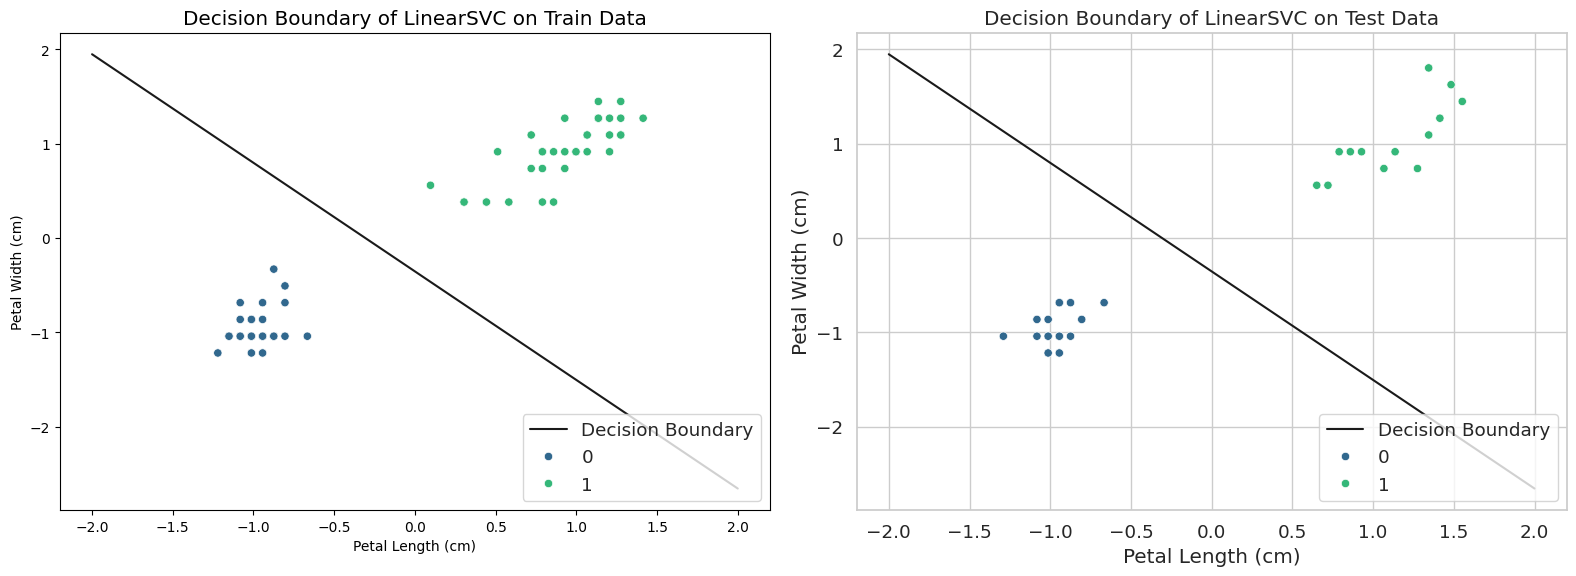

In [63]:

# Fit the model
clf = LinearSVC(random_state=42)
clf.fit(X_train, y_train)

# Calculating decision boundary
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2, 2)
yy = a * xx - (clf.intercept_[0]) / w[1]

# Plot the decision boundary of the model on the train data
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.set(style="whitegrid", font_scale=1.2)
plt.plot(xx, yy, 'k-', label='Decision Boundary')
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette='viridis', legend='full')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Decision Boundary of LinearSVC on Train Data')
plt.legend(loc='lower right')

# Plot the decision boundary of the model on the test data
plt.subplot(1, 2, 2)
sns.set(style="whitegrid", font_scale=1.2)
plt.plot(xx, yy, 'k-', label='Decision Boundary')
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, palette='viridis', legend='full')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Decision Boundary of LinearSVC on Test Data')
plt.legend(loc='lower right')

# using tight layout to evade the overlapping problem

plt.tight_layout()
plt.show()


Accuracy: 1.0
Training Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



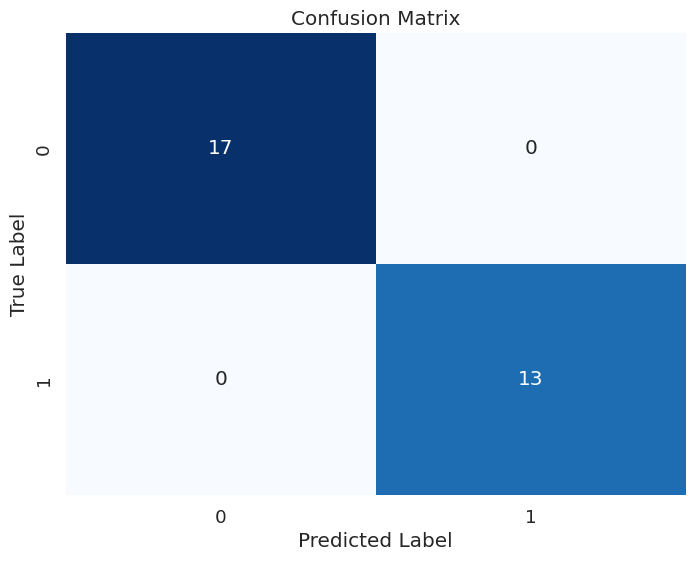

In [64]:
# Predict on test data
y_test_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

# checking if the model is underfitting or overfitting

# Predict on train data

y_pred_train = clf.predict(X_train)

# Calculate accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", accuracy_train)

# Generate classification report
report = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(report)


# Generate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [65]:
# Generate a synthetic dataset using the make moons() function

X, y = make_moons(n_samples=500, noise=0.05, random_state=42)


In [66]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Accuracy for SVC with linear kernel: 0.89
Training Accuracy: 0.8771428571428571
Classification Report for SVC with linear kernel:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89        75
           1       0.88      0.89      0.89        75

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.89      0.89      0.89       150



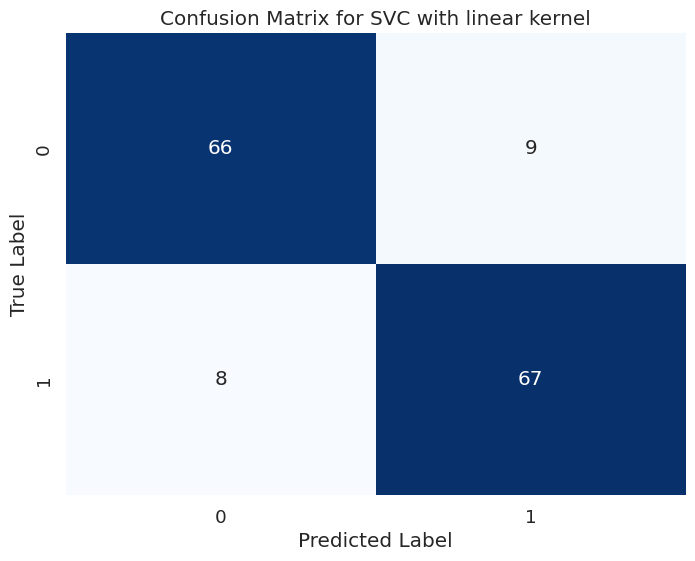

Accuracy for SVC with RBF kernel: 1.00
Training Accuracy: 1.0
Classification Report for SVC with RBF kernel:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        75

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



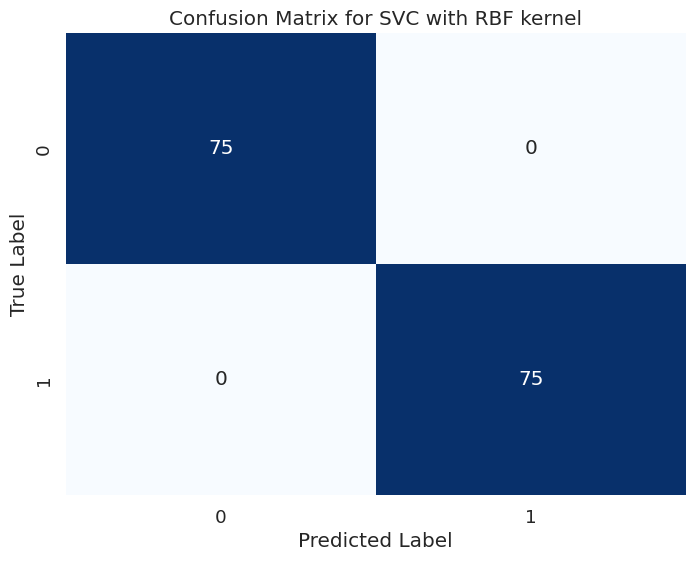

Accuracy for SVC with polynomial kernel: 0.93
Training Accuracy: 0.9142857142857143
Classification Report for SVC with polynomial kernel:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92        75
           1       0.88      0.99      0.93        75

    accuracy                           0.93       150
   macro avg       0.93      0.93      0.93       150
weighted avg       0.93      0.93      0.93       150



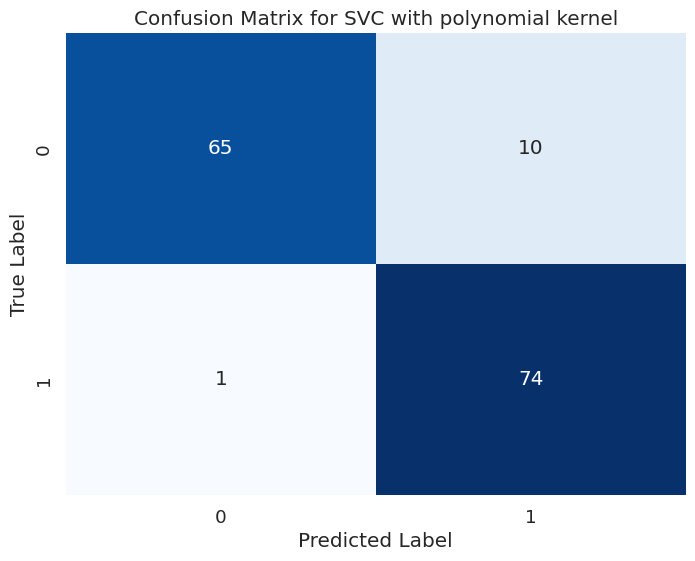

In [67]:
C = 1.0  # SVM regularization parameter

# implement three different kernels

models = (
    svm.SVC(kernel="linear", C=C),
    svm.SVC(kernel="rbf", gamma=0.67, C=C),
    svm.SVC(kernel="poly", degree=5, gamma="auto", C=C),
)

models = (clf.fit(X_train_scaled, y_train) for clf in models)

# titles for the plots
titles = (
    "SVC with linear kernel",
    "SVC with RBF kernel",
    "SVC with polynomial kernel",
)
# evaluate models
for clf, title in zip(models, titles):
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {title}: {accuracy:.2f}")

    # checking if the model is underfitting or overfitting

    # Predict on train data

    y_pred_train = clf.predict(X_train_scaled)

    # Calculate accuracy
    accuracy_train = accuracy_score(y_train, y_pred_train)
    print("Training Accuracy:", accuracy_train)

    # Generate classification report
    report = classification_report(y_test, y_pred)
    print(f"Classification Report for {title}:\n{report}")

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {title}')
    plt.show()



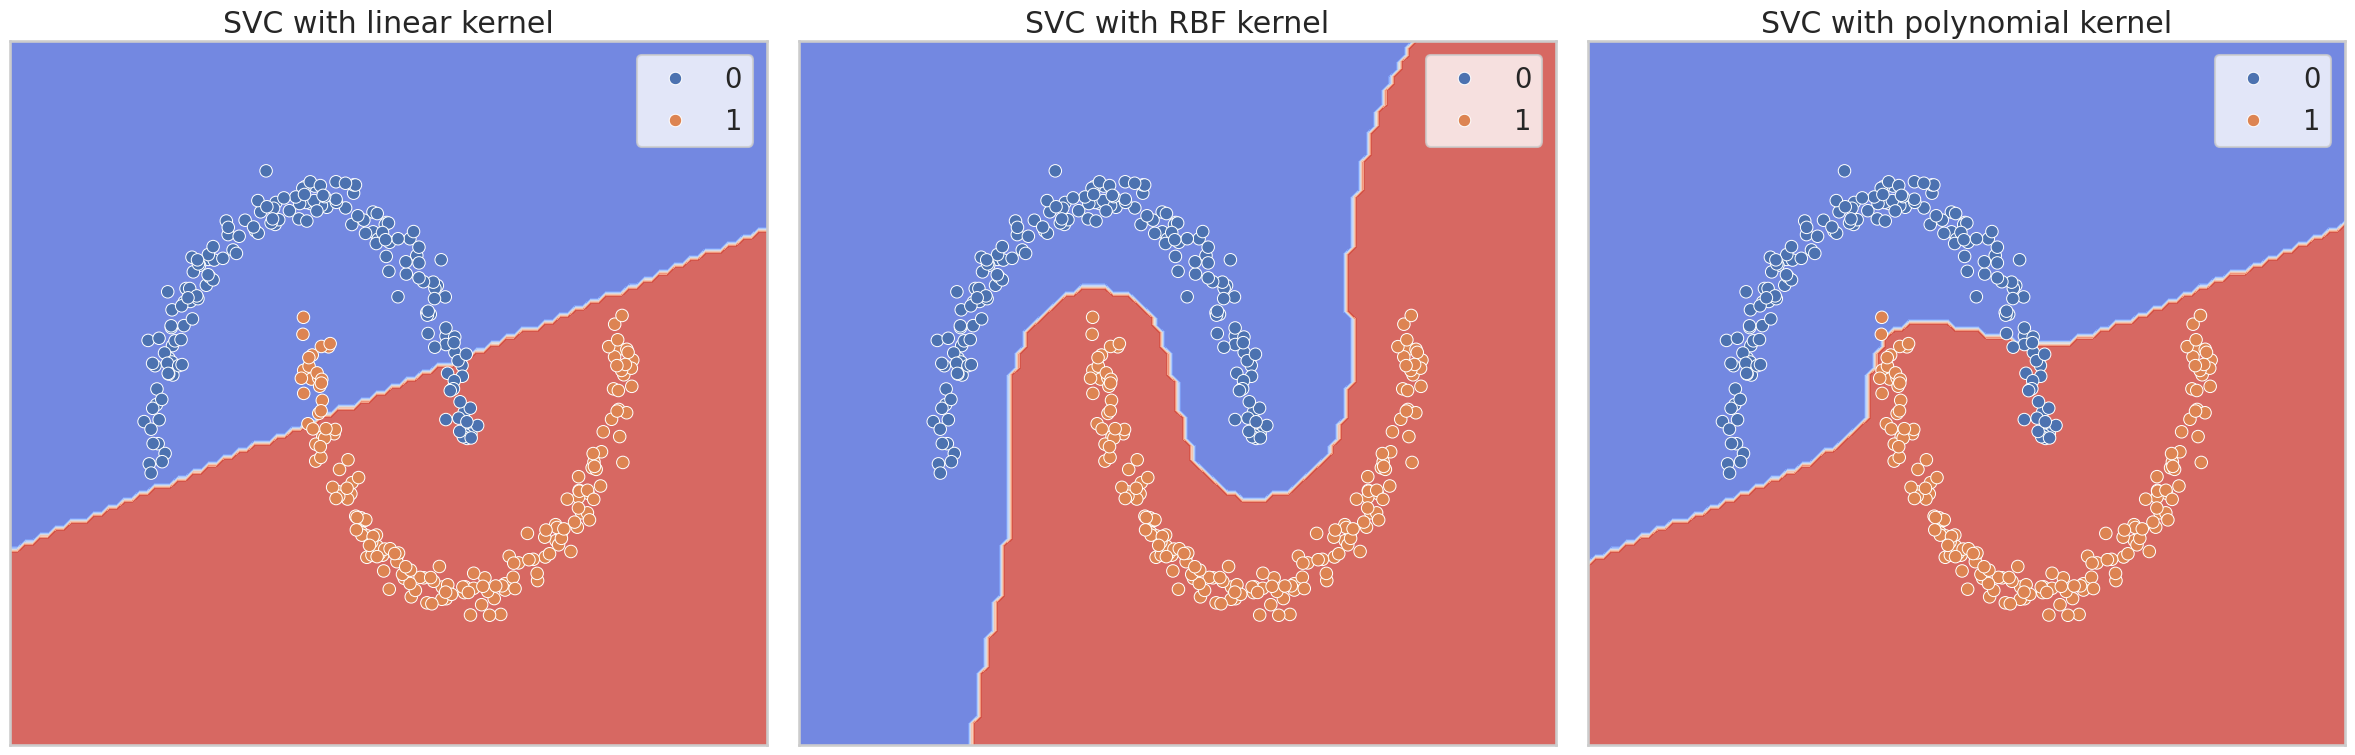

In [68]:
models = (
    svm.SVC(kernel="linear", C=C),
    svm.SVC(kernel="rbf", gamma=0.67, C=C),
    svm.SVC(kernel="poly", degree=5, gamma="auto", C=C),
)

models = (clf.fit(X_train_scaled, y_train) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "SVC with RBF kernel",
    "SVC with polynomial kernel",
)
# Set the style and font
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=1.2)

# Create subplots with adjusted figsize
fig, sub = plt.subplots(1, 3, figsize=(24, 8))

# Plot decision boundary for each kernel
for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_train_scaled,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
    )
    sns.scatterplot(x=X_train_scaled[:, 0], y=X_train_scaled[:, 1], hue=y_train, ax=ax)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.tight_layout()
plt.show()

In [69]:
#focusing on only RBF
# performing hyperparameter tuning
# grid search for gamma and c values

param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.1, 0.01, 0.001, 0.0001]}

grid_search = GridSearchCV(svm.SVC(kernel='rbf', random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_C = best_params['C']
best_gamma = best_params['gamma']
print(best_params)


{'C': 100, 'gamma': 0.1}


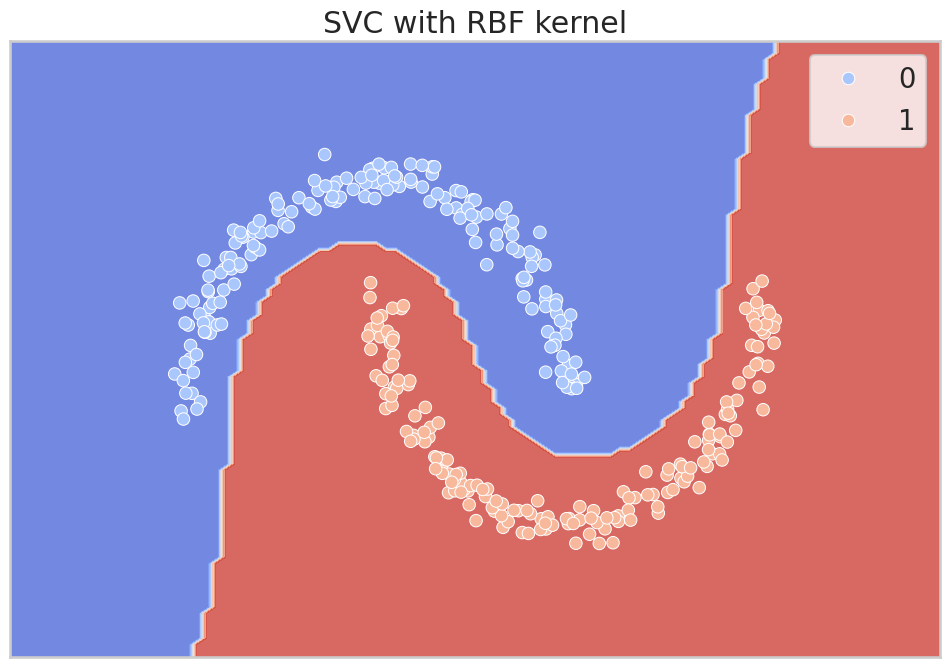

In [70]:
# Plotting the decision boundary for the RBF kernel SVM with the best Hyperparameters
# Set the style and font
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=1.2)

# best hyperparameters
C = 100
gamma = 0.1


model = svm.SVC(kernel="rbf", gamma=gamma, C=C)

# Fit the model
model.fit(X_train_scaled, y_train)

fig, sub = plt.subplots(1, 1, figsize=(12, 8))

# Plot decision boundary
disp = DecisionBoundaryDisplay.from_estimator(
    model,
    X_train_scaled,
    response_method="predict",
    cmap=plt.cm.coolwarm,
    alpha=0.8,
    ax=sub,
)
sns.scatterplot(x=X_train_scaled[:, 0], y=X_train_scaled[:, 1], hue=y_train, palette='coolwarm', ax=sub)
sub.set_xticks(())
sub.set_yticks(())
sub.set_title("SVC with RBF kernel")

plt.show()

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        75

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



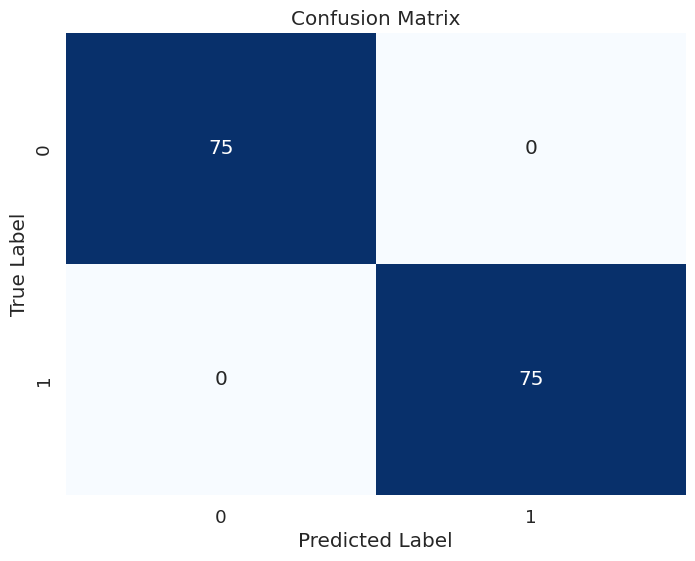

In [71]:
# Predict on test data
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [72]:
# checking if the model is underfitting or overfitting

# Predict on train data

y_pred = model.predict(X_train_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred)
print("Training Accuracy:", accuracy)

Training Accuracy: 1.0
